# Scene Recognition with Deep Learning
For this project we are going to focus for image classification on the 15-scene data with the state-of-the-art approach: deep learning.

Basic learning objectives of this project:
1. Construct the fundamental pipeline for performing deep learning using PyTorch;
2. Understand the concepts behind different layers, optimizers, and learning schedules;
3. Experiment with different models and observe the performance.

The starter code is mostly initialized to 'placeholder' just so that the starter
code does not crash when run unmodified and you can get a preview of how
results are presented.

This project is intended to further familiarize you with Python, PyTorch. Once again, you may find these resources helpful. Python: [here](https://docs.python.org/3/tutorial/). PyTorch: [here](https://pytorch.org/tutorials/).

## Brief
    Hand-in: through Canvas
    Required files: <your_uid>.zip.(Please begin with 'u' for your uid)
                    <your_uid>_proj6.pdf


### Setup

Take note that some of the concepts used in this project have NOT been covered in lectures, hence you may want to use this instruction page as the reference material when you proceed to each section.

We will be installing a NEW environment for this project; follow the instructions below to set up the env. If you run into import module errors, try “pip install -e .” again, and if that still doesn’t work, you may have to create a fresh environment.

Note that although we are training a neural net from scratch for this project, your laptop should be sufficient to handle this (expecting a 5 to 15 minutes training time for Part 1 and 2, and roughly 20 to 35 minutes for Part 3 with only the CPU); you are free to use Google Colab on this, but you may need to figure out a way of putting both the notebook and the dataset into your Google Drive and mount it in the Colab notebook (this tutorial covers everything you need to know to set it up).
    
   0. Unzip proj6_6320.zip and go to proj6_6320 directory.
      - You can run `unzip proj6_6320.zip && mv proj6_train.zip proj6_6320/data && mv proj6_test.zip proj6_6320/data` in your terminal.
      - Run `cd proj6_6320/data && unzip proj6_train.zip && unzip proj6_test.zip && cd ..`
   1. Install [Miniconda](https://docs.conda.io/en/latest/miniconda.html). It doesn’t matter whether you use Python 2 or 3 because we will create our own environment that uses 3 anyways.
   2. Create a conda environment using the appropriate command. On Windows, open the installed “Conda prompt” to run the command. On MacOS and Linux, you can just use a terminal window to run the command, Modify the command based on your OS (linux, mac, or win): `conda env create -f proj6_env_<OS>.yml`.
    - NOTE that `proj6_env_<OS>.yml` is inside the project folder.
   3. This should create an environment named ‘proj6’. Activate it using the Windows command, activate proj6 or the MacOS / Linux command, `source activate proj6`
   4. Install the project package, by running `pip install -e .` inside the repo folder.
   5. Run the notebook using `jupyter notebook` under *proj6_6320* directory.
   6. Ensure that all sanity checks are passing by running pytest tests inside the "proj6_unit_tests/" folder.
   7. Generate the zip folder for the code portion of your submission once you’ve finished the project using 
    
        `python zip_submission.py --uid <your_uid>` 


<!-- ## Library Functions 
Do not use any library functions to implement Hough Transform. -->


### Writeup
For this project, you need to run all your cells and then convert the notebook into pdf. A conversion way is to use the tool provided by Jupyter. Click the items on the menu of this website page:

`File -> Download as -> PDF via LaTeX(.pdf)`
    
You can download it as HTML if the above option doesn't work.
    
You can refer [here](1) in case you encounter any problem. 
    
[1]: https://stackoverflow.com/questions/29156653/ipython-jupyter-problems-saving-notebook-as-pdf
    
Your code, results, visualization, and discussion will be used for the grading. You will be deducted points if the results are not shown in this notebook. Do not change the order of the cells. You can add cells in need. You can copy a cell and run it separately if you need to run a cell multiple times and thus every result is displayed in the cell.
    
### Submission Format

This is very important as you will lose 5 points for every time you do not follow the instructions. You will attach two items in your submission on Canvas:

1. `<your_uid>`.zip containing:
    - proj5_code/ - directory containing all your code for this assignment
    - README.txt - (optional) if you implement any new functions other than the ones we define in the skeleton code (e.g. any extra credit implementations), please describe what you did and how we can run the code. We will not award any extra credit if we can’t run your code and verify the results.

2. `<your_uid>`_proj6.pdf - your report

Do not install any additional packages inside the conda environment. The TAs will use the same environment as defined in the config files we provide you, so anything that’s not in there by default will probably cause your code to break during grading. Do not use absolute paths in your code or your code will break. Use relative paths like the starter code already does. Failure to follow any of these instructions will lead to point deductions. Create the zip file using python zip_submission.py --uid `<your_uid>` (it will zip up the appropriate directories/files for you!)

### Rubric
* +25 pts: Part1   
* +30 pts: Part2
* +35 pts: Part3
* +10  pts: pdf report

Distribution of the points in a Question is separately mentioned for each sub-task

* -5*n pts: Lose 5 points for every time you do not follow the instructions for the hand-in format.
    
### Extra Credits
    
SimpleNet:

* Up to 4 pts: In Part 2, modify the network architecture and achieve a final testing accuracy of 63%; note that you are NOT allowed to add more nn.Conv2d into the model; instead, think about how to improve the model with a concept called “batch normalization”.

AlexNet and beyond:

* Up to 4 pts: Fine-tune your AlexNet and reach a testing accuracy of 93%.
* Up to 6 pts: Fine-tune another network like torchvision.models.resnet, and reach a testing accuracy of 90%.
    


## Datasets
The dataset to be used in this assignment is the 15-scene dataset, containing natural images in 15 possible scenarios like bedrooms and coasts. It’s first introduced by [Lazebnik et al, 2006](https://www.di.ens.fr/willow/pdfs/cvpr06b.pdf). The images have a typical size of around 200 by 200 pixels, and serve as a good milestone for many vision tasks. A sample collection of the images can be found below:
<img src="figures/dataset.png" alt="drawing" width="800" title="eval"/>

In [2]:
import sys
sys.path.append('..')

In [3]:
from proj6_code.runner import Trainer
from proj6_code.optimizer import get_optimizer
from proj6_code.simple_net import SimpleNet
from proj6_code.simple_net_dropout import SimpleNetDropout
from proj6_code.my_alexnet import MyAlexNet
from proj6_code.image_loader import ImageLoader
from proj6_code.data_transforms import get_fundamental_transforms, get_data_augmentation_transforms
from proj6_code.stats_helper import compute_mean_and_std

import torch

%load_ext autoreload
%autoreload 2

In [4]:
from proj6_unit_tests.test_base import verify
from proj6_unit_tests.test_stats_helper import test_mean_and_variance
from proj6_unit_tests.test_image_loader import test_dataset_length, test_unique_vals, test_class_values, test_load_img_from_path
from proj6_unit_tests.test_data_transforms import test_fundamental_transforms
from proj6_unit_tests.test_dl_utils import test_predict_labels, test_compute_loss
from proj6_unit_tests.test_simple_net import test_simple_net
from proj6_unit_tests.test_simple_net_dropout import test_simple_net_dropout
from proj6_unit_tests.test_my_alexnet import test_my_alexnet

In [5]:
is_cuda = True
is_cuda = is_cuda and torch.cuda.is_available() # will turn off cuda if the machine doesnt have a GPU

if is_cuda:
    print("On this machine, there is cuda")
else:
    print("On this machine, there is no cuda")

On this machine, there is no cuda


## Part1: A SimpleNet: Dataset, Model, and Trainer

**Learning Objective:** 

    (1) Understanding the rationale behind data pre-processing, 
    (2) construct a basic Convolutional Neural Net for multi-class classification, 
    (3) understand the use of some basic layers used in neural net, and 
    (4) set up the training workflow in PyTorch.

**Introduction**

In this part, we are going to train a simple convolutional neural net from scratch. We’ll be starting with some modification to the dataloader used in this project to include a few extra pre-processing steps. Subsequently, you will define your own model and optimization function. A trainer class will be provided to you, and you will be able to test out the performance of your model with this complete pipeline of classification problem.

To train a network in PyTorch, we need 4 components:
1. **Dataset** - an object which can load the data and labels given an index.
2. **Model** - an object that contains the network architecture definition.
3. **Loss function** - a function that measures how far the network output is from the ground truth label.
4. **Optimizer** - an object that optimizes the network parameters to reduce the loss value.

### Experiment and Report:
For Part 1, note that you are required to get a final validation accuracy of **50%** to receive full credits.


### Part 1.1: Datasets, Dataloader, and Data Transforms
In this part you’ll be implementing the basic Datasets object, which helps to retrieve the data from your local data folder, and prepare to be used by your model. To start with, finish the compute_mean_and_std() function in stats_helper.py and compute the mean and standard deviation of the dataset. Check out the relevant function in [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) which might be helpful for this; you may probably want to use the function partial_fit here. **Note** that here we want to compute the mean and standard deviation for **all pixels across all images** after you have normalized each image to the range [0, 1], hence when you apply partial_fit, your feature dimension should be 1 and the returning mean and standard deviation should both be a single value. Think about how you can achieve this by reshaping the input to the scaler.

Next, fill in the ImageLoader class in image_loader.py. Note that similar to what you have implemented in Project 1, here the ImageLoader class contains the paths to the dataset images, and should be able to return the expected element given an index. More details can be found in the file.

Additionally, in data_transforms.py, complete the function get_fundamental_transforms(): resize the input, convert it to a tensor, and normalize it using the passed in mean and standard deviation. You may find torchvision.transforms.Resize, torchvision.transforms.ToTensor, torchvision.transforms.Normalize, and torchvision.transforms.Compose useful here, and it should only take a few lines of code.

### Datasets

One crucial aspect of deep learning is to perform data preprocessing. In this project we are going to "zero-center" and "normalize" the dataset. 

### Compute mean and standard deviation of the dataset
To begin with, fill in the `compute_mean_and_std()` in `stats_helper.py` to compute the **mean** and **standard deviation** of both training and validation data.

In [17]:
print("Testing your mean and std computation: ", verify(test_mean_and_variance))
dataset_mean, dataset_std = compute_mean_and_std('../data/')

Testing your mean and std computation:  "Correct"


In [18]:
print('Dataset mean = {}, standard deviation = {}'.format(dataset_mean, dataset_std))

Dataset mean = [0.45547486], standard deviation = [0.25316328]


Now let's create the **Datasets** object to be used later. Remember back in Project 1, we have initialized such a class to load 5 images? Here the task is similar: download the data into the project folder, and then complete the `image_loader.py`. The essence is to retrieve the paths to all the images required, and be able to provide the **path** and the **class id** when given an index.

In [7]:
inp_size = (64,64)
print("Testing your image loader (length):", verify(test_dataset_length))
print("Testing your image loader (values):", verify(test_unique_vals))
print("Testing your image loader (classes):", verify(test_class_values))
print("Testing your image loader (paths):", verify(test_load_img_from_path))

Testing your image loader (length): "Correct"
Testing your image loader (values): "Correct"
Testing your image loader (classes): "Correct"
Testing your image loader (paths): "Correct"


### Data transforms
For this part, complete the function `get_fundamental_transforms()` in `data_transforms.py` to compile a list of fundamental transforms which:
1. Resize the input image to the desired shape;
2. Convert it to a tensor;
3. Normalize them based on the computed mean and standard deviation.

In [8]:
print("Testing your fundamental data transforms: ", verify(test_fundamental_transforms))

Testing your fundamental data transforms:  "Correct"


/Users/selimgilon/Desktop/Utah/Classes/Computer Vision/Projects/proj6_6320/proj6_unit_tests/test_data_transforms.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  expecte

### Part 1.2: SimpleNet:Model
The data is ready! Now we are preparing to move to the actual core of deep learning: the architecture. Now open the simple_net.py and fill in the model definition. By now you should have a decent grasp on how to properly define a deep learning model using nn.Conv2d, nn.ReLU, nn.MaxPool2d, etc. For this part, define a convolutional neural network with 2 conv layers (and the corresponding ReLU, MaxPool, and Fully Connected layers) which aligns with our training dataset (15 classes). Below you may find a sample network architecture which is sufficient to get you pass Part 1 (it's the architecture TAs used in their implementation and is sufficient to get you pass Part 1).
<img src="figures/net.jpg" alt="drawing" width="1000" title="eval"/>

After you have defined the proper model, now fill in the forward function, which accepts the input (a batch of images), and generates the output classes (this should only take a couple of lines of code).

### Model
To get you started in this part, simply define a **2-layer** model in the `simple_net.py`. Here by "2 layers" we mean **2 convolutional layers**, so you need to figure out the supporting utilities like ReLU, Max Pooling, and Fully Connected layers, and configure them with proper parameters to make the tensor flow.


In [9]:
print("Testing your SimpleNet architecture: ", verify(test_simple_net))

Testing your SimpleNet architecture:  "Correct"


In [10]:
simple_model = SimpleNet()

### Loss function
When defining your model architecture, also initialize the `loss_criterion` variable there. Remember this is multi-class classification problem, and think about what loss function might be useful here.

In [11]:
print(simple_model)

SimpleNet(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=500, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=15, bias=True)
  )
  (loss_criterion): CrossEntropyLoss()
)


### Optimizer
Next, **initialize the following cell with proper values for learning rate and weight decay** (you can come back and tune these values for better performance once the trainer section is done), and then fill in the `optimizer.py` to initialize a basic optimization function; this should only take a few lines of code.

In [12]:
# TODO: add a decent initial setting and tune from there
optimizer_config = {
  "optimizer_type": "sgd",
  "lr":  0.1,
  "weight_decay": 0.001
}

In [13]:
optimizer = get_optimizer(simple_model, optimizer_config)

### Part 1.3: SimpleNet: Trainer
We have provided you with a basic trainer (check out the runner.py) where we’ll load in the dataset and train the network you have defined for some epochs. To complete this section, first assign proper values to the dict optimizer_config in the Jupyter notebook with reasonable **learning rate** and **weight decay**, and then fill in the optimizer.py with the default optimization function Adam.

Next, in dl_utils.py, complete predict_labels() and compute_loss(), where you are given an input model, and calculate the corresponding predictions and loss respectively; these functions will be used in the training process later.

Lastly, train it using the starter code in Jupyter Notebook, and report the training process according to the report. Take note that you may use these values (“lr” and “weight_decay”) as a starting point to tune your parameters to pass this part.

You should be able to achieve a 50% accuracy with ease.Here a couple of lines of code for a 2 layer neural net have easily defeated that!

Note that although you are **NOT** required to modify anything in the runner.py, it is still highly recommended to read through the code and understand how to properly define the training process, as well as record the loss history.

### Trainer
Next we define the trainer for the model; to start, complete the `predict_labels()` and `compute_loss()` in `dl_utils.py`: given a model, compute the corresponding predictions and loss respectively.

In [14]:
print("Testing your trainer (model prediction): ", verify(test_predict_labels))
print("Testing your trainer (loss values): ", verify(test_compute_loss))

Testing your trainer (model prediction):  "Correct"
Testing your trainer (loss values):  "Correct"


Then pass in the model, optimizer, transforms for both the training and testing datasets into the trainer, and proceed to the next cell to train it. If you have implemented everything correctly, you should be seeing a decreasing loss value.

**Note** that your CPU should be sufficient to handle the training process for all networks in this project, and the following training cells will take less than 5 minutes; you may also want to decrease the value for `num_epochs` and quickly experiment with your parameters. The default value of **30** is good enough to get you around the threshold for Part 1, and you are free to increase it a bit and adjust other parameters in this part.

In [15]:
# Ensure data is correctly preprocessed
train_data_transforms = get_data_augmentation_transforms(inp_size, dataset_mean, dataset_std)
test_data_transforms = get_fundamental_transforms(inp_size, dataset_mean, dataset_std)

trainer = Trainer(data_dir='../data/', 
                  model = simple_model,
                  optimizer = optimizer,
                  model_dir = '../model_checkpoints/simple_net',
                  train_data_transforms = train_data_transforms,
                  test_data_transforms = test_data_transforms,
                  batch_size = 32,
                  load_from_disk = False,
                  cuda = is_cuda
                 )

In [16]:
trainer.train(num_epochs=50)

Epoch:1, Loss:2.0734
Epoch:2, Loss:2.3309
Epoch:3, Loss:1.8567
Epoch:4, Loss:1.6488
Epoch:5, Loss:2.1037
Epoch:6, Loss:1.6853
Epoch:7, Loss:1.4755
Epoch:8, Loss:2.0098
Epoch:9, Loss:1.0203
Epoch:10, Loss:1.1367
Epoch:11, Loss:0.7436
Epoch:12, Loss:1.8597
Epoch:13, Loss:0.4764
Epoch:14, Loss:1.1531
Epoch:15, Loss:0.3199
Epoch:16, Loss:0.1747
Epoch:17, Loss:0.1743
Epoch:18, Loss:0.2252
Epoch:19, Loss:0.7272
Epoch:20, Loss:0.1877
Epoch:21, Loss:0.2479
Epoch:22, Loss:0.0058
Epoch:23, Loss:0.2303
Epoch:24, Loss:0.1508
Epoch:25, Loss:0.5487
Epoch:26, Loss:0.0449
Epoch:27, Loss:0.0677
Epoch:28, Loss:0.7491
Epoch:29, Loss:0.5032
Epoch:30, Loss:0.0010
Epoch:31, Loss:0.0082
Epoch:32, Loss:0.0669
Epoch:33, Loss:0.0808
Epoch:34, Loss:0.0316
Epoch:35, Loss:0.0690
Epoch:36, Loss:0.0666
Epoch:37, Loss:0.1137
Epoch:38, Loss:0.0021
Epoch:39, Loss:0.0008
Epoch:40, Loss:0.0003
Epoch:41, Loss:0.0005
Epoch:42, Loss:0.0015
Epoch:43, Loss:0.0009
Epoch:44, Loss:0.0010
Epoch:45, Loss:0.0025
Epoch:46, Loss:0.00

After you have finished the training process, now plot out the loss and accuracy history. You can also check out the final accuracy for both training and testing data. Copy the accuracy plots and values onto the report, and answer the questions there. Note that you are required to obtain a **50%** testing accuracy to receive full credits for Part 1.

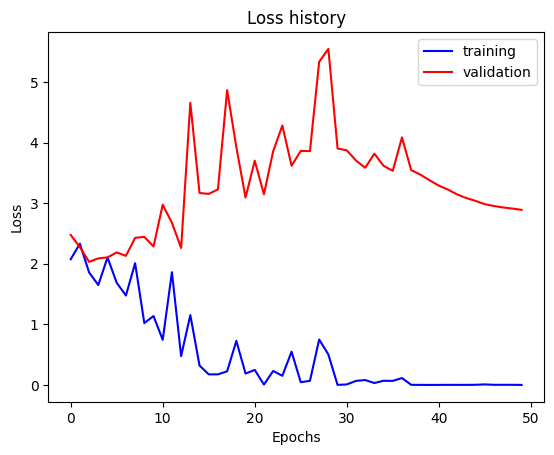

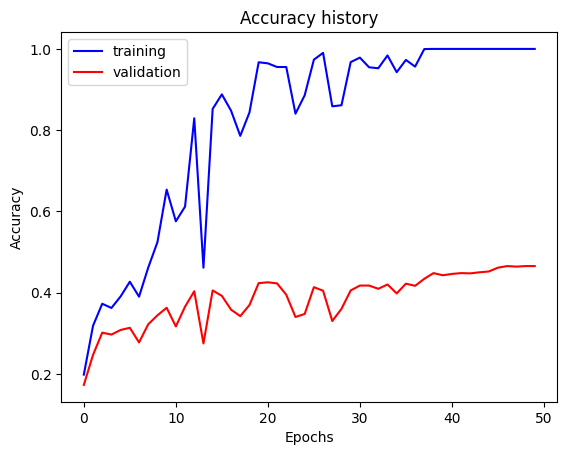

In [17]:
trainer.plot_loss_history()
trainer.plot_accuracy()

In [18]:
train_accuracy = trainer.train_accuracy_history[-1]
validation_accuracy = trainer.validation_accuracy_history[-1]
print('Train Accuracy = {}; Validation Accuracy = {}'.format(train_accuracy, validation_accuracy))

Train Accuracy = 1.0; Validation Accuracy = 0.4653333333333333


## Part 2: Overfitting
Feeling good? We have easily obtained a 50% accuracy on the testing data with a very simple model. Feeling even better for the training accuracy right? More than 90% (if you have implemented everything correctly). But should you?

Our final accuracies for training and testing data differ a lot from each other, which indicates that the model we have defined **fits too well with the training data, but is unable to generalize well on data it has never seen before**: this is often regarded as **overfitting**. In this section we are going to apply 2 techniques to tackle with it: adjusting both data and model.

**Learning Objective:**

    (1) Understanding the effects and cause of **overfitting**, 
    (2) learn about the basic techniques to avoid overfitting, 
    (3) understand the common data augmentation and transforms used in PyTorch, and 
    (4) apply the concept of **dropout** in the network.

**Introduction**

If you have been examining the performance from the previous section, like loss and accuracy, you will notice that our training accuracy is somewhere around **98~100%**, if you have implemented everything correctly. By contrast, the threshold for passing Part 1 is a **50%** accuracy of the testing data; this difference is often regarded as “overfitting”: the model performs much better on the training data, but is not able to generalize well on data it has never seen previously. Normally, 2 reasons lead to this effect:

   * **Data:** If you have examined the dataset, you’ll notice that the number of images used for training totals at around 3000; this could be a relatively small number considering we have 15 classes together; can we do better? There are some real-life scenarios where we could get some insights: if you left-right flip (mirror) an image of a scene, it never changes categories. A kitchen doesn’t become a forest when mirrored. This isn’t true in all domains – a “d” becomes a “b” when mirrored, so you can’t “jitter” digit recognition training data in the same way. But we CAN synthetically increase our amount of training data by left-right mirroring training images during the learning process in this particular project.
   
   * **Model:** We have trained our model to fit well with the training data, but obviously it’s doing “too well”. To counter this, we are going to use a technique called “dropout” to regularize the network. What does dropout regularization do? It randomly turns off network connections at training time to fight overfitting. This prevents a unit in one layer from relying too strongly on a single unit in the previous layer. Dropout regularization can be interpreted as simultaneously training many “thinned” versions of your network. At test time all connections are restored, which is analogous to taking an average prediction over all of the “thinned” networks.
   
### Experiment and Report:

For Part 2, note that you are required to get a final testing accuracy of **55%** to receive full credits. Similar to Part 1, you may need to start with some optimization configuration values in the Jupyter notebook, and gradually tune it for better performance. Also, take a screenshot of what you have done in get_data_augmentation_transforms(), and put it inside the report.

### Part 2.1: Jitter, Random Flip, and Normalization
One common technique to increase the "variability" of the data is to **augment** it. Firstly, we don't have a huge amount of data, so let's "jitter" based on it; secondly, when you mirror an image of a **kitchen**, you can tell that the mirrored image is still a kitchen. 

Open the data_transforms.py: you’ll find some starter code where the data input is cropped in the center and then transformed into a tensor. Add another 2 data transformations in `get_data_augmentation_transforms()` function in `data_transforms.py` where you could jitter the data, and randomly flip the data left-to-right. You may find the methods transforms.RandomHorizontalFlip() and transforms.ColorJitter() helpful in this part. Pay attention to the **position** where you insert those transforms! You may first copy your existing fundamental transform implementation into this function, and then insert a couple of other transforms which help you do the above adjustment.



In [11]:
inp_size = (64,64)

### Part 2.2: Dropout
"Dropout" is a technique commonly used to regularize the network. It randomly turns off the connection between neurons inside the network and prevent the network from relying too much on a specific neuron. Follow the below instruction and finish the `simple_net_dropout.py` with your previous SimpleNet model, plus the dropout layer, and lastly re-run the training process as below.

Open the simple_net_dropout.py, and first copy your existing “SimpleNet” model into this file, and then append a dropout layer in the model. You may use the default dropout probability from nn.Dropout() for regularization.

With the new data augmentation and dropout added into the model, let’s re-run the trainer and check its performance. Follow the template code used in the notebook, and train the “regularized” network with the new data transforms. You should be seeing that compared with Part 1, your training accuracy drops but testing accuracy improves.


In [12]:
print("Testing your SimpleNetDropout architecture: ", verify(test_simple_net_dropout))

Testing your SimpleNetDropout architecture:  "Correct"


In [13]:
simple_model_dropout = SimpleNetDropout()
print(simple_model_dropout)

SimpleNetDropout(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Dropout(p=0.15, inplace=False)
    (3): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (5): ReLU()
    (6): Dropout(p=0.15, inplace=False)
    (7): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=500, out_features=500, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=500, out_features=100, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=100, out_features=15, bias=True)
  )
  (loss_criterion): CrossEntropyLoss()
)


Similar to the previous part, **initialize the following cell with proper values for learning rate and weight decay**.

In [19]:
# TODO: add a decent initial setting and tune from there
optimizer_config = {
  "optimizer_type": "sgd",
  "lr":  0.1,
  "weight_decay": 0.001
}

In [20]:
optimizer = get_optimizer(simple_model_dropout, optimizer_config)

In [21]:
trainer = Trainer(data_dir='../data/', 
                  model = simple_model_dropout,
                  optimizer = optimizer,
                  model_dir = '../model_checkpoints/simple_net_dropout',
                  train_data_transforms = get_data_augmentation_transforms(inp_size, dataset_mean, dataset_std),
                  test_data_transforms = get_fundamental_transforms(inp_size, dataset_mean, dataset_std),
                  batch_size = 32,
                  load_from_disk = False,
                  cuda = is_cuda
                 )

The following cell will take longer than Part 1, as now we have more data (and more variability), and the model is slightly more complicated than before as well; however, it should finish within 10~15 minutes anyway, and the default `num_epochs` is also good enough as a starting point for you to pass this part.

In [22]:
trainer.train(num_epochs=60)

Epoch:1, Loss:2.9355
Epoch:2, Loss:2.1460
Epoch:3, Loss:1.4647
Epoch:4, Loss:1.5673
Epoch:5, Loss:1.7138
Epoch:6, Loss:1.9939
Epoch:7, Loss:1.7915
Epoch:8, Loss:2.1018
Epoch:9, Loss:1.8881
Epoch:10, Loss:1.9278
Epoch:11, Loss:0.8458
Epoch:12, Loss:2.0993
Epoch:13, Loss:1.2386
Epoch:14, Loss:2.1411
Epoch:15, Loss:3.4277
Epoch:16, Loss:1.4633
Epoch:17, Loss:1.8545
Epoch:18, Loss:1.4240
Epoch:19, Loss:2.0064
Epoch:20, Loss:1.8311
Epoch:21, Loss:1.4450
Epoch:22, Loss:1.6908
Epoch:23, Loss:1.3691
Epoch:24, Loss:1.3549
Epoch:25, Loss:1.5328
Epoch:26, Loss:1.5127
Epoch:27, Loss:1.5100
Epoch:28, Loss:1.2611
Epoch:29, Loss:2.0145
Epoch:30, Loss:2.0924
Epoch:31, Loss:2.4820
Epoch:32, Loss:1.4457
Epoch:33, Loss:1.2067
Epoch:34, Loss:1.1231
Epoch:35, Loss:0.7222
Epoch:36, Loss:0.9770
Epoch:37, Loss:1.3997
Epoch:38, Loss:1.5582
Epoch:39, Loss:1.6528
Epoch:40, Loss:2.1882
Epoch:41, Loss:2.1352
Epoch:42, Loss:1.4692
Epoch:43, Loss:1.3212
Epoch:44, Loss:2.3370
Epoch:45, Loss:1.0356
Epoch:46, Loss:1.12

Similar to the previous part, now plot out the loss and accuracy history. You'll need to pass a threshold of **55%** to receive full credits for this part. Also copy the plots onto the report, and answer the questions accordingly.

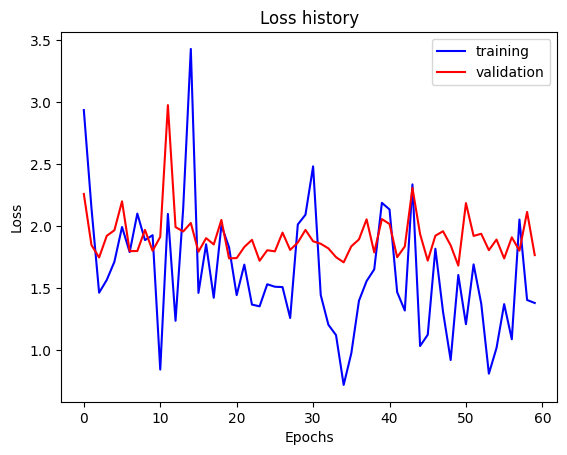

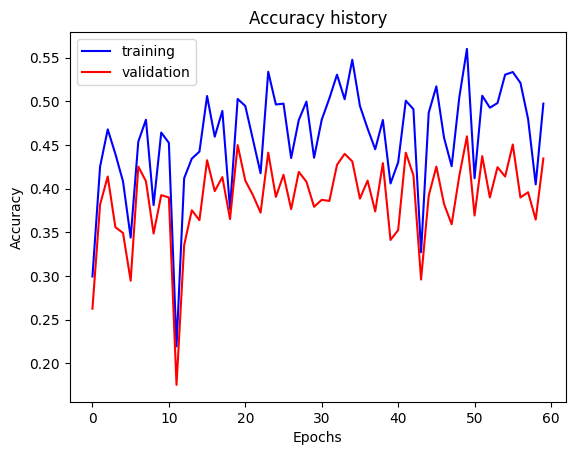

In [23]:
trainer.plot_loss_history()
trainer.plot_accuracy()

In [24]:
train_accuracy = trainer.train_accuracy_history[-1]
validation_accuracy = trainer.validation_accuracy_history[-1]
print('Train Accuracy = {}; Validation Accuracy = {}'.format(train_accuracy, validation_accuracy))

Train Accuracy = 0.49748743718592964; Validation Accuracy = 0.43466666666666665


## Part 3: AlexNet
You can see that after the above adjustment, our model performance increases in terms of testing accuracy. Although the training accuracy drops, now it's closer to the testing values and that's more natural in terms of performance. But we are not satisfied with the final performance yet. Our model, in the end, is still a 2-layer SimpleNet and it might be capable of capturing some features, but could be improved a lot if we go **deeper**. In this part we are going to see the power of a famous model: AlexNet.

**Learning Objective:** 

    (1) Understanding the rationale of deep learning, 
    (2) learn to utilize pretrained models defined by PyTorch, 
    (3) understand the concept of fine-tuning, and 
    (4) achieve good classification results with the help of pretrained model weights.
    
### Introduction

Ever since 2012, deep learning has been extremely successful in vision related tasks, and everything blows up from a model named AlexNet.

Training a relatively complex model like AlexNet completely from scratch is sometimes overwhelming, especially when GPU is not available. However, PyTorch has already incorporated the pretrained weights of some famous model and provide you with the option of loading it directly.

#### Part 3.1: AlexNet Model Definition
Now switch to my_alexnet.py, and first load the AlexNet using model=torchvision.models.alexnet(pretrained=True).

Note that in the original AlexNet model, there are **1000** output classes, while we have 15 for this project. Here we are going to retrieve some layers from an existing network, and concatenate them with your own custom layers: in simple_net.py, when you have obtained the AlexNet model, retrieve the convolutional layers (which helps you to detect the features) and the fully connected layers (which generates the classification scores), remove the last Linear layer, and replace it with a proper layer which could output the scores for 15 classes. You may find module.children() helpful here.

#### Part 3.2: Fine-tuning AlexNet
Notice that what we have done is merely defining the final layer with the correct dimensions, but the weights of the layer are just some random values and it won’t be able to produce the desired scores. In the Jupyter Notebook, follow the starter code and train the newly defined network. Note that AlexNet has millions of parameters, so training it from scratch could cause problems for your laptop with no GPU support, hence here we are only training it for 5 epochs and the expected running time is around 20 minutes without a GPU. In addition, note that you do NOT need to update the weights for earlier layers of the model, therefore, freeze the weights of the convolution layers and some of the fully connected layers of the model (think about which FC layers to freeze by printing out the model architecture), and then train the network following the template code in the notebook, observe the performance and answer the questions in the report. You may find weight.requires_grad and bias.requires_grad helpful here.

### Experiment and Report:

For Part 3, note that you are required to get a final testing accuracy of 85% to receive full credits.


In [18]:
inp_size = (224, 224)

### Part 3.1 & 3.2: Fine-tuning the AlexNet
Now switch to `my_alexnet.py`, and define a AlexNet which can be fit onto our dataset: PyTorch has provided us with pre-trained models like AlexNet, so what you want to do is to load the model first, and then adjust some of the layers such that it fits with our own dataset, instead of outputing scores to 1000 classes from the original AlexNet model.

After you have defined the correct architecture of the model, make some tweaks to the existing layers: **freeze** the **convolutional** layers and first 2 **linear** layers so we don't update the weights of them; more details can be found in the instruction webpage.

In [21]:
print("Testing your AlexNet architecture: ", verify(test_my_alexnet))

Testing your AlexNet architecture:  "Correct"


In [29]:
my_alexnet = MyAlexNet()

num_params_grad = 0
num_params_nograd = 0
for param in my_alexnet.parameters():
    if param.requires_grad:
      num_params_grad += param.numel()
    else:
      num_params_nograd += param.numel()
        
print('Number of trainable parameters: ', num_params_grad)
print('Number of non-trainable parameters: ', num_params_nograd)
  
  
print(my_alexnet)

Number of trainable parameters:  61455
Number of non-trainable parameters:  57003840
MyAlexNet(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=

In [42]:
# TODO: add a decent initial setting and tune from there
optimizer_config = {
  "optimizer_type": "adam",
  "lr": 1e-3,
  "weight_decay": 3e-3
}

In [43]:
optimizer = get_optimizer(my_alexnet, optimizer_config)

In [44]:
trainer = Trainer(data_dir='../data/', 
                  model = my_alexnet,
                  optimizer = optimizer,
                  model_dir = '../model_checkpoints/myalexnet/',
                  train_data_transforms = get_data_augmentation_transforms(inp_size, dataset_mean, dataset_std),
                  test_data_transforms = get_fundamental_transforms(inp_size, dataset_mean, dataset_std),
                  batch_size = 32,
                  load_from_disk = False,
                  cuda = is_cuda
                 )

The following training cell will take roughly 20 minutes or slightly more using CPU (but possibly under 5 minute using GPU depending on the batch size; the TAs got it within 3 minutes on a GTX1060).

In [45]:
trainer.train(num_epochs=7)

Epoch:1, Loss:0.1357
Epoch:2, Loss:0.2166
Epoch:3, Loss:2.1655
Epoch:4, Loss:0.7833
Epoch:5, Loss:5.3921
Epoch:6, Loss:0.3806
Epoch:7, Loss:0.2880


Like both previous sections, you are required to pass a threshold of **85%** for this part. Copy the plots and values onto the report and answer questions accordingly.

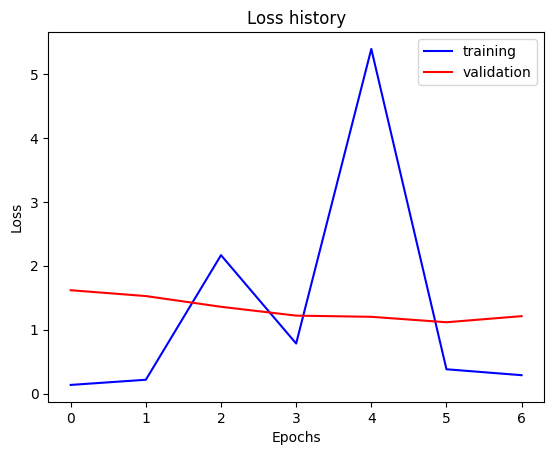

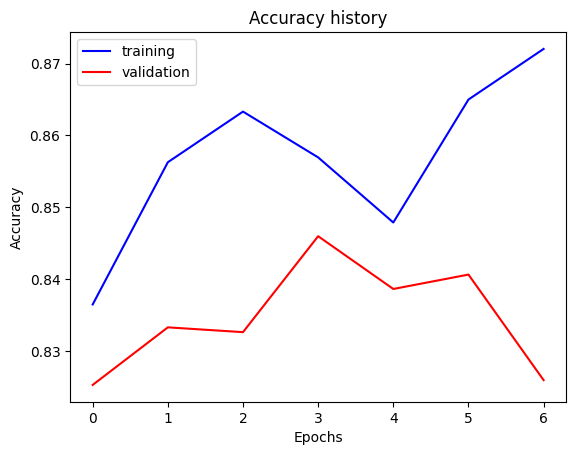

In [46]:
trainer.plot_loss_history()
trainer.plot_accuracy()

In [47]:
train_accuracy = trainer.train_accuracy_history[-1]
validation_accuracy = trainer.validation_accuracy_history[-1]
print('Train Accuracy = {}; Validation Accuracy = {}'.format(train_accuracy, validation_accuracy))

Train Accuracy = 0.8720268006700167; Validation Accuracy = 0.826


With all these we have concluded the last project of CS6320 Computer Vision. Things might be hard along the way, but we hope you enjoyed this journey and have learnt something in this field. Our team has learnt a lot from you guys as well, so thank you and wish you all the best in your future endeavors!